<a href="https://colab.research.google.com/github/GitBerg/Machine_Learning_Study/blob/master/09-Avalia%C3%A7%C3%A3o%20de%20algoritmos%20de%20classifica%C3%A7%C3%A3o/Machine_Learning_Avalia%C3%A7%C3%A3o_De_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Avaliação dos Algoritmos



*  Naïve Bayes: 93.80
*  Árvore de decisão: 98.20
*  Random forest: 98.40
*  Regras: 97.40
*  Knn: 98.60
*  Regressão logística: 94.60
*  SVM: 98.80
*  Redes neurais: 99.80



###Tuning dos Parâmetros com GridSearch


---




####Preparação dos dados

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [3]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [4]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [5]:
import numpy as np
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
X_credit.shape

(2000, 3)

In [6]:
X_credit

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 1.37445674, -1.05746281, -1.12564819],
       [-1.57087737, -0.63488173, -0.36981671],
       [-1.03572293, -0.93978122,  0.04244312]])

In [7]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)
y_credit.shape

(2000,)

In [8]:
y_credit

array([0, 0, 0, ..., 0, 1, 1])

###Árvore de decisão

In [9]:
parametros = {'criterion' : ['gini', 'entropy'],
               'splitter' : ['best', 'random'],
               'min_samples_split' : [2, 5, 10],
               'min_samples_leaf' : [1, 5, 10]}

In [10]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


###Random Forest

In [11]:
parametros = {'criterion' : ['gini', 'entropy'],
               'n_estimators' : [10, 40, 100, 150],
               'min_samples_split' : [2, 5, 10],
               'min_samples_leaf' : [1, 5, 10]}

In [12]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
0.986


###Knn

In [13]:
parametros = {'n_neighbors' : [3, 5, 10, 20],
              'p' : [1, 2]}

In [14]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


###Regressão Logística

In [15]:
parametros = {'tol' : [0.0001, 0.00001, 0.000001],
              'C' : [1.0 , 1.5 , 2.0],
              'solver' : ['lbfgs' , 'sag', 'saga']}

In [16]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


###SVM

In [17]:
parametros = {'tol' : [0.001, 0.0001, 0.00001],
              'C' : [1.0, 1.5, 2.0],
              'kernel' : ['rbf', 'linear','poly', 'sigmoid']}

In [18]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


###Redes Neurais

In [19]:
parametros = {'activation' : ['relu', 'logistic', 'tahn'],
              'solver' : ['adam', 'sgd'],
              'batch_size' : [10, 56]}

In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

In [21]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
0.9975000000000002


##Validação Cruzada

In [22]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  scores = cross_val_score(arvore, X_credit, y_credit, cv = kfold)
  ##print (scores)
  ##print(scores.mean())
  resultados_arvore.append(scores.mean())

  random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf = 1, min_samples_split= 5, n_estimators= 10 )
  scores = cross_val_score(random_forest, X_credit, y_credit,cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier(n_neighbors = 20, p = 1)
  scores = cross_val_score(knn, X_credit, y_credit,cv = kfold)
  resultados_knn.append(scores.mean())

  logistica = LogisticRegression(solver = 'lbfgs', C = 1.0, tol = 0.0001)
  scores = cross_val_score(logistica, X_credit, y_credit,cv = kfold)
  resultados_logistica.append(scores.mean())

  svm = SVC(kernel = 'rbf', C = 1.5, tol = 0.0001)
  scores = cross_val_score(svm, X_credit, y_credit,cv = kfold)
  resultados_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation = 'relu', solver = 'adam', batch_size = 56)
  scores = cross_val_score(rede_neural, X_credit, y_credit,cv = kfold)
  resultados_rede_neural.append(scores.mean())

In [24]:
import pandas as pd
resultados = pd.DataFrame({'Arvore' : resultados_arvore, 'Random_forest' : resultados_random_forest, 
                           'KNN' : resultados_knn, 'Logistica' : resultados_logistica,
                           'SVM' : resultados_svm, 'Rede neural' : resultados_rede_neural})
resultados

,Arvore,Random_forest,KNN,Logistica,SVM,Rede neural
0,0.9865,0.9845,0.9800,0.9475,0.9835,0.9970
1,0.9855,0.9825,0.9800,0.9465,0.9835,0.9985
2,0.9905,0.9865,0.9800,0.9470,0.9835,0.9970
3,0.9870,0.9810,0.9800,0.9460,0.9845,0.9970
4,0.9885,0.9850,0.9810,0.9465,0.9855,0.9980
5,0.9890,0.9840,0.9785,0.9465,0.9830,0.9975
6,0.9885,0.9825,0.9800,0.9470,0.9840,0.9975
7,0.9875,0.9855,0.9805,0.9480,0.9845,0.9975
8,0.9855,0.9835,0.9810,0.9465,0.9820,0.9965
9,0.9875,0.9835,0.9810,0.9465,0.9830,0.9970


In [25]:
resultados.describe()

,Arvore,Random_forest,KNN,Logistica,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987200,0.983650,0.980200,0.946950,0.983950,0.997167
std,0.001896,0.002077,0.001270,0.000687,0.001155,0.000547
min,0.982000,0.980000,0.977500,0.945500,0.982000,0.996000
25%,0.986125,0.982000,0.979625,0.946500,0.983125,0.997000
50%,0.987250,0.983750,0.980000,0.947000,0.984000,0.997000
75%,0.988375,0.985375,0.981000,0.947500,0.984500,0.997500
max,0.990500,0.987000,0.983500,0.948500,0.987000,0.998500


In [26]:
resultados.var()

Arvore           3.596552e-06
Random_forest    4.312931e-06
KNN              1.613793e-06
Logistica        4.715517e-07
SVM              1.333621e-06
Rede neural      2.988506e-07
dtype: float64

In [27]:
(resultados.std()/resultados.mean()) * 100

Arvore           0.192105
Random_forest    0.211128
KNN              0.129601
Logistica        0.072517
SVM              0.117366
Rede neural      0.054823
dtype: float64

##Teste de Normalidade nos Resultados

In [28]:
alpha = 0.05

In [29]:
from scipy.stats import shapiro

In [30]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica),shapiro(resultados_svm), shapiro(resultados_rede_neural)

((0.9479231834411621, 0.14869770407676697),
 (0.9490901827812195, 0.15982601046562195),
 (0.9244088530540466, 0.03495403751730919),
 (0.9370993375778198, 0.07600117474794388),
 (0.9658124446868896, 0.4317886233329773),
 (0.8958943486213684, 0.006674647331237793))

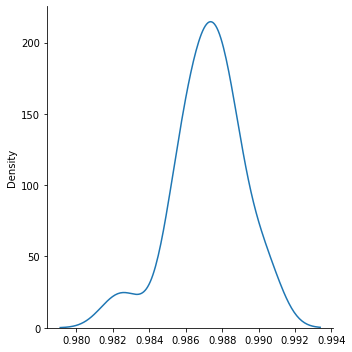

In [31]:
import seaborn as sns
sns.displot(resultados_arvore, kind = 'kde');

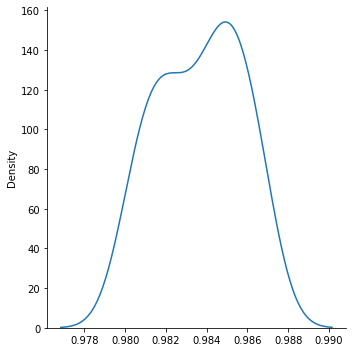

In [32]:
sns.displot(resultados_random_forest, kind = 'kde');

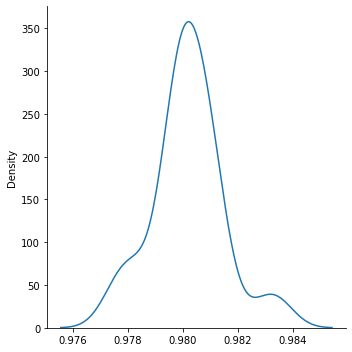

In [33]:
sns.displot(resultados_knn, kind = 'kde');

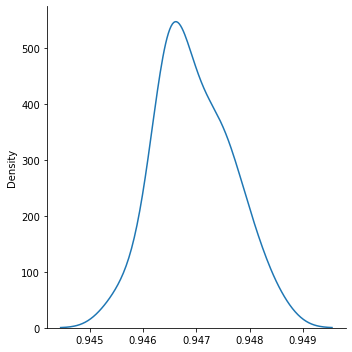

In [34]:
sns.displot(resultados_logistica, kind = 'kde');

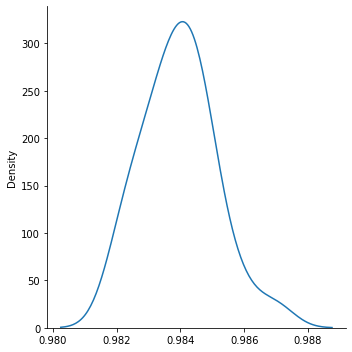

In [35]:
sns.displot(resultados_svm, kind = 'kde');

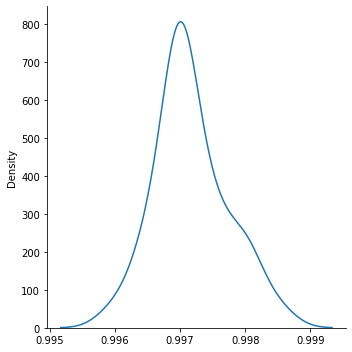

In [36]:
sns.displot(resultados_rede_neural, kind = 'kde');

##Teste de Hipótese com ANOVA e Tukey

In [37]:
from scipy.stats import f_oneway

In [38]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural)
p

2.634998600048717e-182

In [39]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')


Hipótese nula rejeitada. Dados são diferentes


In [40]:
resultados_algoritmos = {'accuracy' : np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                                      'algoritmo' :  ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                                                      'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
                                                      'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                                                      'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                                                      'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                                                      'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

In [41]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.9865,arvore
1,0.9855,arvore
2,0.9905,arvore
3,0.9870,arvore
4,0.9885,arvore
...,...,...
175,0.9975,rede_neural
176,0.9970,rede_neural
177,0.9970,rede_neural
178,0.9965,rede_neural


In [42]:
from statsmodels.stats.multicomp import MultiComparison

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [43]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [44]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
       arvore           knn   -0.007 0.001  -0.008  -0.006   True
       arvore     logistica  -0.0403 0.001 -0.0413 -0.0392   True
       arvore random_forest  -0.0035 0.001 -0.0046 -0.0025   True
       arvore   rede_neural     0.01 0.001  0.0089   0.011   True
       arvore           svm  -0.0032 0.001 -0.0043 -0.0022   True
          knn     logistica  -0.0333 0.001 -0.0343 -0.0322   True
          knn random_forest   0.0034 0.001  0.0024  0.0045   True
          knn   rede_neural    0.017 0.001  0.0159   0.018   True
          knn           svm   0.0037 0.001  0.0027  0.0048   True
    logistica random_forest   0.0367 0.001  0.0357  0.0377   True
    logistica   rede_neural   0.0502 0.001  0.0492  0.0513   True
    logistica           svm    0.037 0.001   0.036   0.038   True
random_for

In [45]:
resultados.mean()

Arvore           0.987200
Random_forest    0.983650
KNN              0.980200
Logistica        0.946950
SVM              0.983950
Rede neural      0.997167
dtype: float64

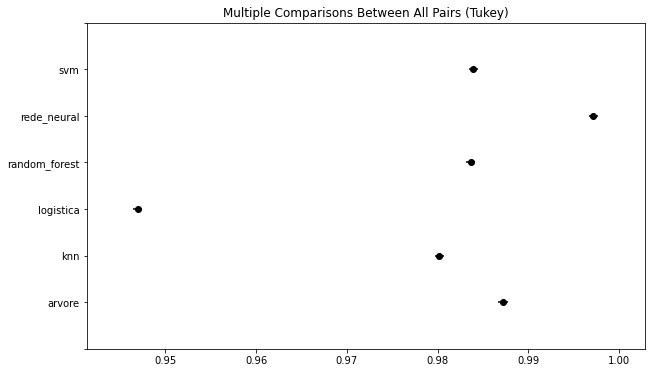

In [46]:
teste_estatistico.plot_simultaneous();

##Salvar um Classificador já Treinado

In [57]:
classificador_rede_neural = MLPClassifier(activation='relu', batch_size = 56, solver = 'adam')
classificador_rede_neural.fit(X_credit, y_credit)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size=56, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [58]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 1, min_samples_split = 5, splitter = 'best')
classificador_arvore.fit(X_credit, y_credit)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [59]:
classificador_svm = SVC(C=1.5, kernel = 'rbf')
classificador_svm.fit(X_credit, y_credit)

SVC(C=1.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
pickle.dump(classificador_rede_neural, open('rede_neural_finalizado.sav' , 'wb'))
pickle.dump(classificador_arvore, open('arvore_finalizado.sav' , 'wb'))
pickle.dump(classificador_svm, open('svm_finalizado.sav' , 'wb'))

##Carregar um Classificador já Treinado

In [61]:
rede_neural = pickle.load(open('rede_neural_finalizado.sav' , 'rb'))
arvore = pickle.load(open('arvore_finalizado.sav', 'rb'))
svm = pickle.load(open('svm_finalizado.sav', 'rb'))

In [62]:
novo_registro = X_credit[0]
novo_registro

array([-1.3754462 ,  0.50631087,  0.10980934])

In [63]:
novo_registro.shape

(3,)

In [64]:
novo_registro = novo_registro.reshape(1, -1)
novo_registro.shape

(1, 3)

In [65]:
novo_registro

array([[-1.3754462 ,  0.50631087,  0.10980934]])

In [66]:
rede_neural.predict(novo_registro)

array([0])

In [67]:
arvore.predict(novo_registro)

array([0])

In [68]:
svm.predict(novo_registro)

array([0])

In [69]:
novo_registro = X_credit[1999]
novo_registro = novo_registro.reshape(1, -1)
novo_registro.shape

(1, 3)

In [71]:
novo_registro

array([[-1.03572293, -0.93978122,  0.04244312]])

In [70]:
rede_neural.predict(novo_registro)

array([1])

In [72]:
arvore.predict(novo_registro)

array([1])

In [73]:
svm.predict(novo_registro)

array([1])